In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [169]:
titanic = pd.read_csv('titanic_train.csv')

In [170]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis and Visualization

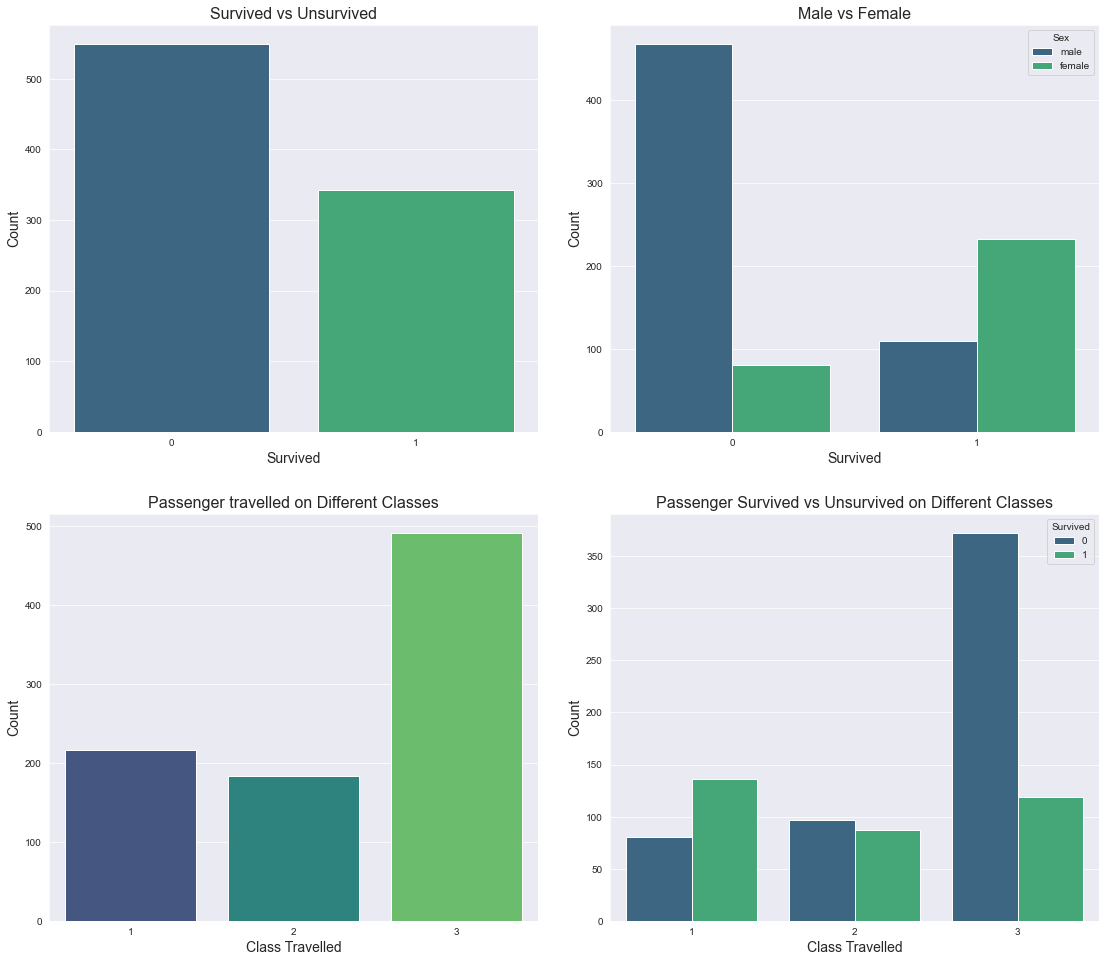

In [171]:
plt.figure(figsize=(16,14))
#Survived vs Unsurvived
plt.subplot(2,2,1)
sns.countplot(titanic['Survived'],palette='viridis');
plt.title('Survived vs Unsurvived',fontsize=16)
plt.xlabel('Survived',fontsize=14)
plt.ylabel('Count',fontsize=14);
#Male vs Female
plt.subplot(2,2,2)
sns.countplot(titanic['Survived'],hue=titanic['Sex'],palette='viridis');
plt.title('Male vs Female',fontsize=16)
plt.xlabel('Survived',fontsize=14)
plt.ylabel('Count',fontsize=14);
#Passesnger Travelled on Different Classes
plt.subplot(2,2,3)
sns.countplot(titanic['Pclass'],palette='viridis');
plt.title('Passenger travelled on Different Classes',fontsize=16)
plt.xlabel('Class Travelled',fontsize=14)
plt.ylabel('Count',fontsize=14);
#Passesnger Travelled on Different Classes Survived vs Unsurvived
plt.subplot(2,2,4)
sns.countplot(titanic['Pclass'],hue=titanic['Survived'],palette='viridis');
plt.title('Passenger Survived vs Unsurvived on Different Classes',fontsize=16)
plt.xlabel('Class Travelled',fontsize=14)
plt.ylabel('Count',fontsize=14);
plt.tight_layout(pad=3.0)

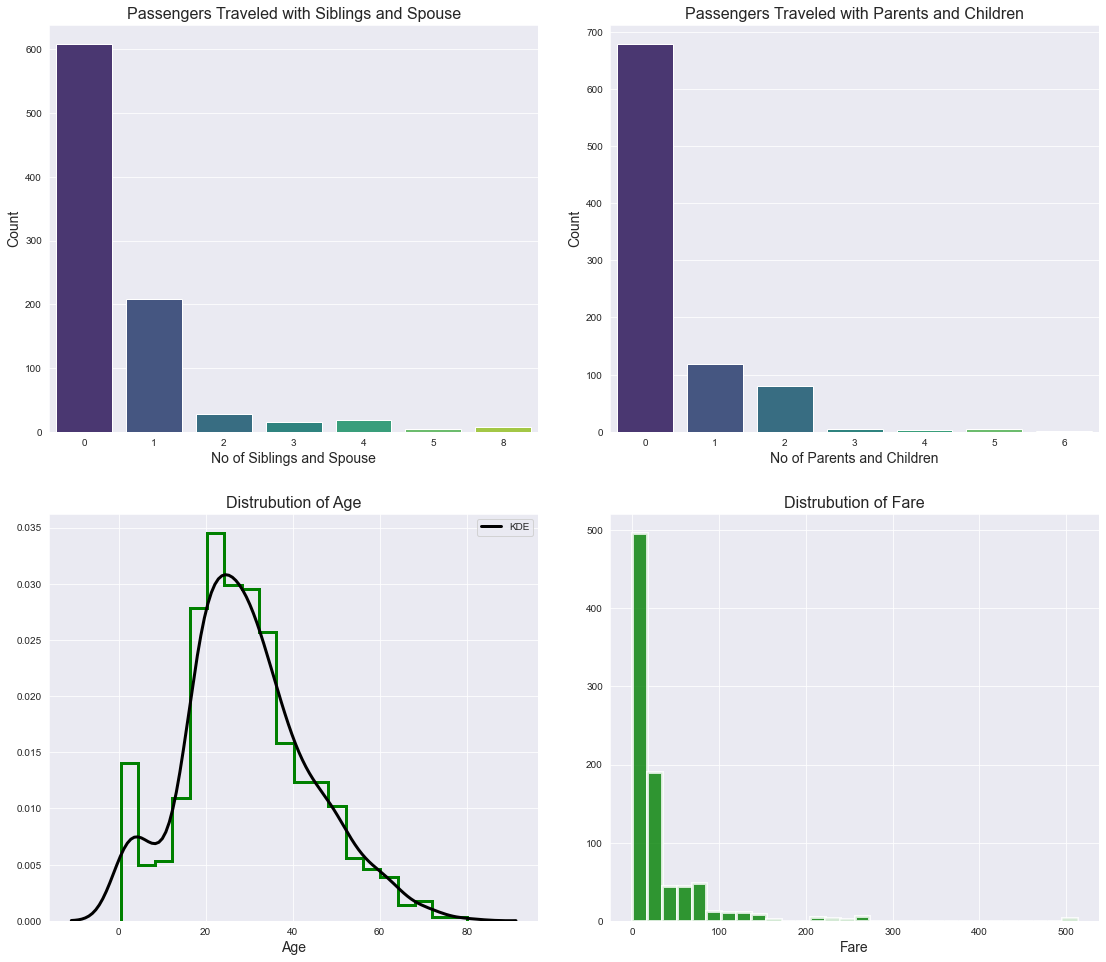

In [172]:
plt.figure(figsize=(16,14))
#Passengers Traveled with Siblings and Spouse
plt.subplot(2,2,1)
sns.countplot(titanic['SibSp'],palette='viridis');
plt.title('Passengers Traveled with Siblings and Spouse',fontsize=16)
plt.xlabel('No of Siblings and Spouse',fontsize=14)
plt.ylabel('Count',fontsize=14);
#Passengers Traveled with Parents and Children
plt.subplot(2,2,2)
sns.countplot(titanic['Parch'],palette='viridis');
plt.title('Passengers Traveled with Parents and Children',fontsize=16)
plt.xlabel('No of Parents and Children',fontsize=14)
plt.ylabel('Count',fontsize=14);
#Distrubution of Age
plt.subplot(2,2,3)
sns.distplot(titanic['Age'],kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth":3,"alpha":1,"color": "g"})
plt.title('Distrubution of Age',fontsize=16)
plt.xlabel('Age',fontsize=14)
#Distrubution of Fare
plt.subplot(2,2,4)
sns.distplot(titanic['Fare'],kde=False,hist_kws={'lw':3,"alpha":0.8,"color":"g"},bins=30);
plt.title('Distrubution of Fare',fontsize=16)
plt.xlabel('Fare',fontsize=14)
plt.tight_layout(pad=3.0)


## Missing values and Outlier Treatment

In [173]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
titanic = titanic.drop('Cabin',axis=1)
titanic['Fare'] = np.log(titanic['Fare'])

In [175]:
def impute(col):
    age = col[0]
    clas = col[1]
    if(pd.isnull(age)):
        if(clas==1):
            return 37
        elif(clas == 2):
            return 29
        else:
            return 25
    return age    

In [176]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute,axis=1)

In [177]:
titanic.dropna(inplace=True)

In [178]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

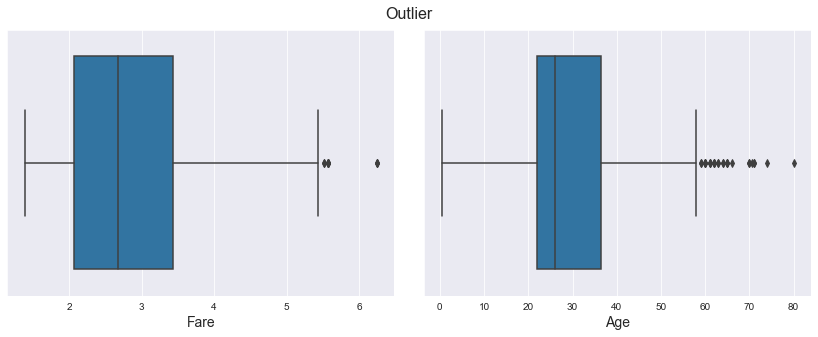

In [179]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=titanic['Fare'],data=titanic)
plt.xlabel('Fare',fontsize=14)
plt.subplot(1,2,2)
sns.boxplot(x=titanic['Age'],data=titanic)
plt.xlabel('Age',fontsize=14)
plt.suptitle('Outlier',fontsize=16);
plt.tight_layout(pad=3.0)

In [180]:
Q1 = titanic['Age'].quantile(0.25)
Q3 = titanic['Age'].quantile(0.75)
IQR = Q3-Q1
low_wiskers = Q1-1.5*IQR
upper_wiskers = Q3+1.5*IQR
titanic= titanic[(titanic['Age']>low_wiskers)&(titanic['Age']<upper_wiskers)]

In [181]:
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3-Q1
low_wiskers = Q1-1.5*IQR
upper_wiskers = Q3+1.5*IQR
titanic = titanic[(titanic['Fare']>low_wiskers)&(titanic['Fare']<upper_wiskers)]

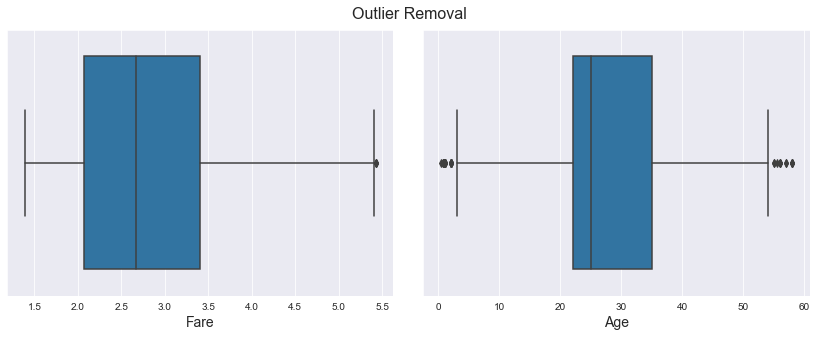

In [182]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=titanic['Fare'],data=titanic)
plt.xlabel('Fare',fontsize=14)
plt.subplot(1,2,2)
sns.boxplot(x=titanic['Age'],data=titanic)
plt.xlabel('Age',fontsize=14)
plt.suptitle('Outlier Removal',fontsize=16);
plt.tight_layout(pad=3.0)

In [183]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Converting Categorical Values

In [184]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,S


In [185]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [186]:
#Mapping Sex Column Male-0,Female-1
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
#Getting Dummies for Embarked
embarked = pd.get_dummies(titanic['Embarked'])
#Dropping original column and concatinating encoded column
titanic = titanic.drop('Embarked',axis=1)
titanic = pd.concat([titanic,embarked],axis=1)
#Creating Family as Sbsp+Parch and dropping SbSp&Parch
titanic['Family'] = titanic['SibSp']+titanic['Parch']
titanic = titanic.drop(['SibSp','Parch'],axis=1)

In [187]:
#Dropping Columns
titanic.drop('Ticket',axis=1,inplace=True)
titanic.drop('PassengerId',axis=1,inplace=True)
titanic = titanic.drop('Name',axis=1)

In [188]:
test = pd.read_csv('titanic_test.csv')

In [189]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Family
0,0,3,0,22.0,1.981001,0,0,1,1
1,1,1,1,38.0,4.266662,1,0,0,1
2,1,3,1,26.0,2.070022,0,0,1,0
3,1,1,1,35.0,3.972177,0,0,1,1
4,0,3,0,35.0,2.085672,0,0,1,0


In [190]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [191]:
#handling Missing Value
test['Age'] = test[['Age','Pclass']].apply(impute,axis=1)
test = test.drop('Cabin',axis=1)
#Mapping Sex Column Male-0,Female-1
test['Sex'] = test['Sex'].map({'male':0,'female':1})
#Getting Dummies for Embarked
embarked = pd.get_dummies(test['Embarked'])
#Dropping original column and concatinating encoded column
test = test.drop('Embarked',axis=1)
test = pd.concat([test,embarked],axis=1)
#Creating Family as Sbsp+Parch and dropping SbSp&Parch
test['Family'] = test['SibSp']+test['Parch']
test = test.drop(['SibSp','Parch'],axis=1)

In [192]:
#Dropping Columns
test.drop(['Ticket','PassengerId','Name'],axis=1,inplace=True)

In [195]:
test = test.fillna(int(test['Fare'].mean()))

In [199]:
titanic.shape

(837, 9)

In [200]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [202]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
#Kogistic Regression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)


LogisticRegression()

In [204]:
model_log.score(X_train,y_train)

0.8071428571428572

In [205]:
log_pred = model_log.predict(X_test)

In [206]:
model_log.score(X_test,y_test)

0.779783393501805

In [207]:
#Support Vector Classifier
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train,y_train)
model_svm.score(X_train,y_train)

0.8428571428571429

In [208]:
model_svm.score(X_test,y_test)

0.8014440433212996

In [209]:
#Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
model_rf.score(X_train,y_train)

0.9803571428571428

In [210]:
model_rf.score(X_test,y_test)

0.8050541516245487

## Hyper Parameter Tuning


In [212]:
#Scaling Entire Dataset
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test)

In [215]:

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [232]:
CV_rfc = GridSearchCV(estimator=model_rf, param_grid=param_grid,cv= 5)
CV_rfc.fit(X_scaled,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [238]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [239]:
#Retraining with best Parameters
model_cvrf = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='log2',n_estimators=200)
model_cvrf.fit(X_scaled,y)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=200)

In [240]:
model_cvrf.score(X_scaled,y)

0.9175627240143369

In [241]:
pred = model_cvrf.predict(test_scaled)

In [242]:
#Submission
test_df = pd.read_csv('titanic_test.csv')
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':pred})
submission.to_csv('submission.csv',index=False)